# *Gender Bias in Virtual Assistants Project*

### Identificando Preconceitos de Gênero em Assistentes Virtuais

![From Google](https://media-assets-01.thedrum.com/cache/images/thedrum-prod/s3-news-tmp-145694-untitled_design_70--default--1280.png)

### Equipe formada por
- Bárbara Stéphanie Neves Oliveira, 507526
- Lucas Benjamim Cunha Bandeira, 507533
- Samir Braga Chaves, 513788
- Vinicius Bernardo Gabriel, 475210

# LSTM *Classifier for MDGender Dataset*

<center>
  <img width="600" src="https://drive.google.com/uc?id=11KlguWCUIDUzA8bN5dtzzab4tiY_2pz4"/>
</center>

---

### Classificação Multiclasse

<center>
  <img width="400" src="https://lena-voita.github.io/resources/lectures/text_clf/intro/example_document-min.png"/>
</center>

# Warning

**Para reproducibilidade, a execução deste *script* deve ser feita pelo Google Colab para uso da TPU.**

**Caso não queira, sugerimos comentar no módulo `model.py` toda a configuração da TPU.**

**Também é necessário realizar o [*download*](https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip) das *word embeddings* pré-treinadas do *FastText* disponíveis no [*link*](https://fasttext.cc/docs/en/english-vectors.html).**

# Imports

In [ ]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook
import tensorflow as tf
from tensorflow.keras.metrics import AUC
from tensorflow_addons.metrics import F1Score

from sklearn.metrics import classification_report

BASE_PATH = '...'
DATASETS_PATH = BASE_PATH + "/resources/datasets"

/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.3.0 and strictly below 2.6.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.6.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [ ]:
# Adicionando módulos customizados ao path
import sys
import warnings
warnings.filterwarnings('ignore')

sys.path.append(BASE_PATH + '/modules')

import utils, text, model
from importlib import reload

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.66.209.106:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.66.209.106:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


# Leitura dos Dados

In [ ]:
df = pd.read_csv(DATASETS_PATH + '/MDGender/md_gender_bias/convai2_inferred/new_data.csv')
df = df.sample(n=50000, random_state=42)
df.head()

,text,binary_label,binary_score,ternary_label,ternary_score,text_tokens,clean_text,text_tokens_count,clean_text_words2ignore,labels_enc,label_pos_0,label_pos_1,label_pos_2
79407,i am good . just looking at my antiques .,1,0.5068,neutral,0.4622,"['good', 'looking', 'antiques']",i am good just looking at my antiques,8,good looking antiques,2,0.0,0.0,1.0
12001,"i don't mind , but i just happen to live a few...",0,0.9509,male,0.9076,"['dont', 'mind', 'happen', 'live', 'houses', '...",i dont mind but i just happen to live a few ho...,16,dont mind happen live houses miley cyrus,1,0.0,1.0,0.0
5709,why are you nervous ? are you looking for some...,0,0.6219,male,0.3930,"['nervous', 'looking', 'like']",why are you nervous are you looking for someon...,12,nervous looking like,1,0.0,1.0,0.0
42688,that is good are you in college or high school,0,0.5238,male,0.3609,"['good', 'college', 'high', 'school']",that is good are you in college or high school,10,good college high school,1,0.0,1.0,0.0
83527,i work for an insurance company . would you wa...,1,0.6509,female,0.3839,"['work', 'insurance', 'company', 'want', 'some...",i work for an insurance company would you want...,13,work insurance company want someday,0,1.0,0.0,0.0


In [ ]:
labels = ['female', 'male', 'neutral']

# Leitura das *Word Embeddings* Pré-Treinadas

In [ ]:
FASTTEXT = {}
f = open(BASE_PATH + '/resources/FastText Word Embeddings/wiki-news-300d-1M.vec', encoding='utf8')
index = 1

for line in f:
  values = line.split()
  word = values[0]
  FASTTEXT[word] = (index, np.asarray(values[1:], dtype='float32'))
  index += 1
f.close()

print('Quantidade de word embeddings = {}'.format(len(FASTTEXT.keys())))

Quantidade de word embeddings = 999995


# Treinamento do LSTM *Classifier*

<center>
  <img width="600" src="https://lena-voita.github.io/resources/lectures/text_clf/neural/rnn/rnn_final_state-min.png"/>
</center>

## Representação Textual

In [ ]:
df['text_tokens'] = df['text_tokens'].apply(lambda x: list(ast.literal_eval(x)))

padded_tokens = text.padding_sequences_ftext(df['text_tokens'].to_numpy(), FASTTEXT, text.MAX_LENGTH)


Text to sequences for LSTM Classifier with FastText embeddings:   0%|          | 0/50000 [00:00<?, ?it/s]

Padding the sequences...


## Divisão Estratificada

In [ ]:
y = df[['label_pos_0', 'label_pos_1', 'label_pos_2']].to_numpy()

X_train, y_train, X_test, y_test, X_dev, y_dev = text.data_split(padded_tokens, y, test_size=0.2, dev_size=0.1, random_seed=42)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape), (X_dev.shape, y_dev.shape), y.shape

(((36001, 60), (36001, 3)),
 ((10000, 60), (10000, 3)),
 ((3999, 60), (3999, 3)),
 (50000, 3))

In [ ]:
from collections import Counter
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix

result_comb_matrix = pd.DataFrame({
    'data':  Counter(str(combination) for row in get_combination_wise_output_matrix(y, order=1) for combination in row),
    'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y_train, order=1) for combination in row),
    'test':  Counter(str(combination) for row in get_combination_wise_output_matrix(y_test, order=1) for combination in row),
    'dev':   Counter(str(combination) for row in get_combination_wise_output_matrix(y_dev, order=1) for combination in row)
}).T.fillna(0.0)

result_comb_matrix.style.background_gradient(cmap=plt.get_cmap('Pastel2'))

,"(2,)","(1,)","(0,)"
data,22526,14006,13468
train,16219,10085,9697
test,4505,2801,2694
dev,1802,1120,1077


In [ ]:
test_data = pd.DataFrame(columns=['tokens_ids', 'y'])

for ids, y in zip(X_test, y_test):
  test_data = test_data.append({
      'tokens_ids': ids,
      'y': y
  }, ignore_index=True)

test_data.to_json(DATASETS_PATH + '/MDGender/md_gender_bias/convai2_inferred/lstm_padded_test_data.json', orient='records')

## Treino do Modelo

In [ ]:
embedding_dim = 300
embedding_matrix = np.random.random((len(FASTTEXT.keys()) + 1, embedding_dim))

with tqdm_notebook(total=len(FASTTEXT.items())) as pbar:
  for word in FASTTEXT.keys():
      embedding_tuple = FASTTEXT.get(word)
      if embedding_tuple is not None:
          embedding_matrix[embedding_tuple[0]] = embedding_tuple[1]
      pbar.update(1)
  pbar.close()

  0%|          | 0/999995 [00:00<?, ?it/s]

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

auc_score = AUC(multi_label=True)
# f1_score = F1Score(num_classes=y.shape[1], threshold=0.5, average='weighted')

model_path = BASE_PATH + '/resources/models/best_lstm_classifier_convai.h5'

model_meta = model.run_text_classifier(model.lstm_classifier,
                                       X_train, y_train,
                                       X_dev, y_dev,
                                       batch_size=32,
                                       max_epochs=100,
                                       patience=10,
                                       eval_metric=auc_score,
                                       monitor='val_auc',
                                       source_length=text.MAX_LENGTH,
                                       hidden_units=128,
                                       labels_size=len(labels), 
                                       model_path=model_path,
                                       vocab_size=len(FASTTEXT.keys()) + 1,
                                       embedding_dim=embedding_dim,
                                       embedding_matrix=embedding_matrix)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 60, 300)           299998800 
_________________________________________________________________
lstm (LSTM)                  (None, 60, 128)           219648    
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0     

1126/1126 [==============================] - 62s 53ms/step - loss: 0.6216 - auc: 0.5383 - val_loss: 0.6146 - val_auc: 0.7139

Epoch 00001: val_auc improved from -inf to 0.71385, saving model to /content/drive/MyDrive/Ciência de Dados/Projeto Final/Resources/Models/best_lstm_classifier_md_gender.h5
Epoch 2/100
1126/1126 [==============================] - 61s 54ms/step - loss: 0.5829 - auc: 0.6884 - val_loss: 0.5273 - val_auc: 0.7650

Epoch 00002: val_auc improved from 0.71385 to 0.76498, saving model to /content/drive/MyDrive/Ciência de Dados/Projeto Final/Resources/Models/best_lstm_classifier_md_gender.h5
Epoch 3/100
1126/1126 [==============================] - 62s 55ms/step - loss: 0.5230 - auc: 0.7625 - val_loss: 0.4964 - val_auc: 0.8008

Epoch 00003: val_auc improved from 0.76498 to 0.80082, saving model to /content/drive/MyDrive/Ciência de Dados/Projeto Final/Resources/Models/best_lstm_classifier_md_gender.h5
Epoch 4/100
1126/1126 [==============================] - 61s 54ms/step

In [ ]:
model_meta['run_time'], model_meta['start'], model_meta['final']

('01:10:49', '17/08/2021 22:21', '17/08/2021 23:38')

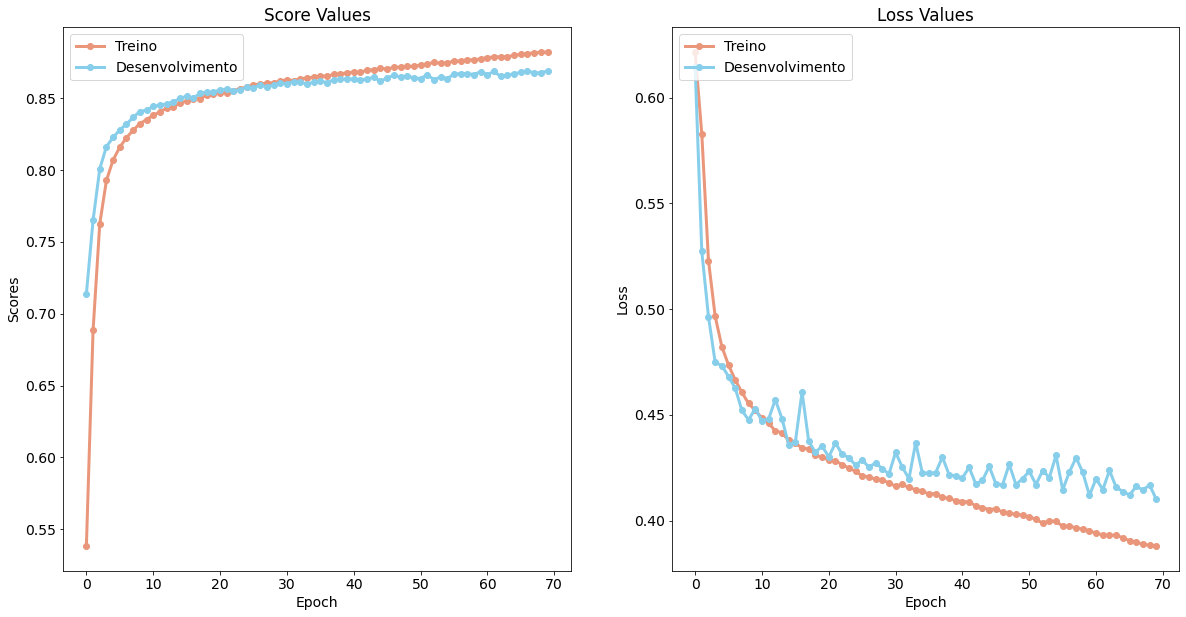

In [ ]:
model.plot_model_loss_score(model_meta['history'], score_name='auc')

In [ ]:
model_meta['model'].load_weights(model_path)
y_pred = np.rint(model_meta['model'].predict(X_test))

print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

      female       0.77      0.44      0.56      2694
        male       0.73      0.58      0.64      2801
     neutral       0.71      0.79      0.75      4505

   micro avg       0.73      0.64      0.68     10000
   macro avg       0.74      0.60      0.65     10000
weighted avg       0.73      0.64      0.67     10000
 samples avg       0.64      0.64      0.64     10000

